# Datos Faltantes

In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [8]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
279,0.038076,0.050680,-0.024529,0.004658,-0.026336,-0.026366,0.015505,-0.039493,-0.015999,-0.025930,200.0
369,-0.009147,-0.044642,0.037984,-0.040099,-0.024960,-0.003819,-0.043401,0.015858,-0.005142,0.027917,167.0
159,-0.005515,-0.044642,0.043373,0.087287,0.013567,0.007141,-0.013948,-0.002592,0.042341,-0.017646,195.0
374,-0.107226,-0.044642,-0.034229,-0.067642,-0.063487,-0.070520,0.008142,-0.039493,-0.000612,-0.079778,140.0
354,-0.023677,0.050680,0.045529,0.021872,0.109883,0.088873,0.000779,0.034309,0.074191,0.061054,272.0
164,0.045341,-0.044642,-0.019140,0.021872,0.027326,-0.013527,0.100183,-0.039493,0.017765,-0.013504,214.0
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024055,0.023775,111.0
290,0.059871,0.050680,0.076786,0.025315,0.001183,0.016849,-0.054446,0.034309,0.029935,0.044485,332.0
219,-0.089063,-0.044642,-0.041774,-0.019442,-0.066239,-0.074277,0.008142,-0.039493,0.001148,-0.030072,185.0
309,-0.009147,0.050680,0.001339,-0.002228,0.079612,0.070084,0.033914,-0.002592,0.026717,0.081764,142.0


In [9]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [12]:
data.isnull().sum() #Esto suma todos los nulls de cada columna

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
bmi_median = pd.DataFrame(imputer.fit_transform(data[['bmi']]), columns=['bmi_median'])
print(bmi_median)

     bmi_median
0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
..          ...
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030

[442 rows x 1 columns]


### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [37]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
knn_median = pd.DataFrame(knn_imputer.fit_transform(data[['bmi', 'bp']]), columns=['bmi_knn', 'bp_knn'])

# Comparacaion:
bmi_nan_original = data['bmi'].isna()
# bp_nan_original  = data['bp'].isna()


comp = pd.concat([data[['bmi', 'bp']].reset_index(drop=True),
                  bmi_median.reset_index(drop=True),
                  knn_median.reset_index(drop=True)], axis=1)


# Comparar solamente donde bmi era nan
bmi_cmp = comp.loc[bmi_nan_original, ['bmi_median', 'bmi_knn']].copy()
bmi_cmp['diff_knn_minus_median'] = bmi_cmp['bmi_knn'] - bmi_cmp['bmi_median']

print("BMI — comparison on imputed rows only")
print(bmi_cmp.describe())




BMI — comparison on imputed rows only
         bmi_median    bmi_knn  diff_knn_minus_median
count  4.400000e+01  44.000000              44.000000
mean  -7.283766e-03   0.005781               0.013065
std    8.773894e-19   0.032896               0.032896
min   -7.283766e-03  -0.040696              -0.033412
25%   -7.283766e-03  -0.011595              -0.004311
50%   -7.283766e-03  -0.000205               0.007079
75%   -7.283766e-03   0.020335               0.027619
max   -7.283766e-03   0.119898               0.127182


### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

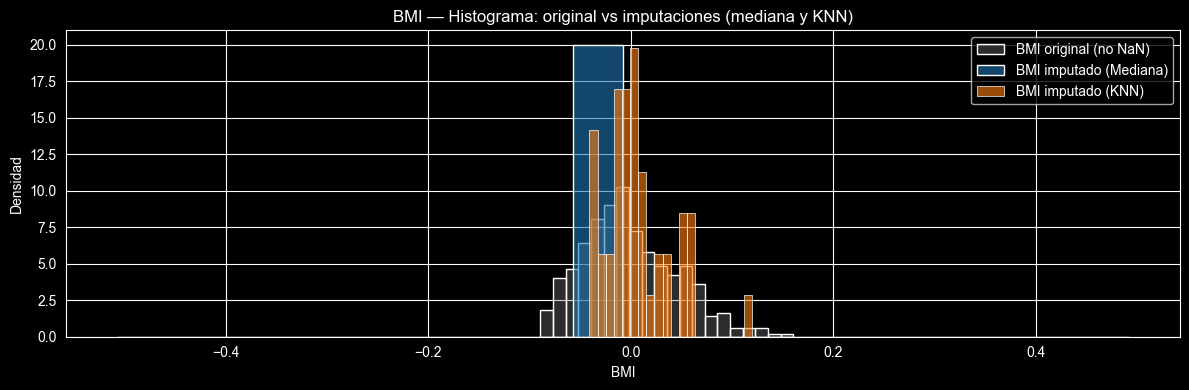

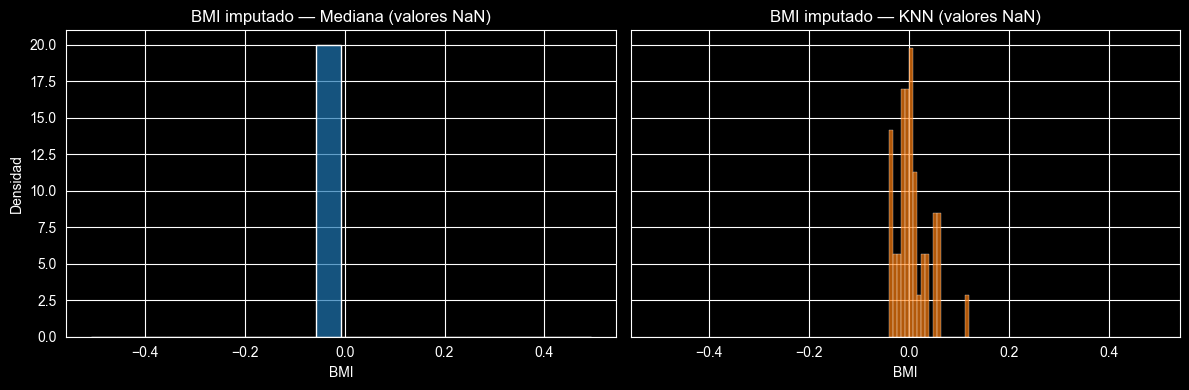

In [39]:
# 1) Histograma general
plt.figure(figsize=(12, 4))
bins = 20

# Original (valores NaN)
sns.histplot(comp.loc[~bmi_nan_original, 'bmi'], bins=bins, color='gray', alpha=0.35, stat='density', label='BMI original (no NaN)')

# Imputado por mediana (valores NaN)
sns.histplot(comp.loc[bmi_nan_original, 'bmi_median'], bins=bins, color='tab:blue', alpha=0.6, stat='density', label='BMI imputado (Mediana)')

# Imputado por KNN (valores NaN)
sns.histplot(comp.loc[bmi_nan_original, 'bmi_knn'], bins=bins, color='tab:orange', alpha=0.6, stat='density', label='BMI imputado (KNN)')

plt.title("BMI — Histograma: original vs imputaciones (mediana y KNN)")
plt.xlabel("BMI")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

# Mediana vs KNN
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

sns.histplot(comp.loc[bmi_nan_original, 'bmi_median'], bins=bins, color='tab:blue', alpha=0.7, stat='density', ax=axes[0])
axes[0].set_title("BMI imputado — Mediana (valores NaN)")
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Densidad")

sns.histplot(comp.loc[bmi_nan_original, 'bmi_knn'], bins=bins, color='tab:orange', alpha=0.7, stat='density', ax=axes[1])
axes[1].set_title("BMI imputado — KNN (valores NaN)")
axes[1].set_xlabel("BMI")

plt.tight_layout()
plt.show()
